In [1]:
library(readxl)
library(dplyr)
library(tidyr)



Anexando pacote: ‘dplyr’


Os seguintes objetos são mascarados por ‘package:stats’:

    filter, lag


Os seguintes objetos são mascarados por ‘package:base’:

    intersect, setdiff, setequal, union




# num_covariates_10

In [3]:
file_names <- c("BCF(no_pi_hat)_num_covariates_10.xlsx", "BCF(pi_hat)_num_covariates_10.xlsx", "BCF(pi_oracle)_num_covariates_10.xlsx")
model_names <- c("BCF(no_pi_hat)", "BCF(pi_hat)", "BCF(pi_oracle)")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_cover", "ATE_len", "pi_RMSE", "pi_MAE")


# Function to read data and calculate summary statistics
read_and_summarize <- function(file_name, model_name) {
  df <- read_excel(file_name)
  means <- df %>% summarise(across(all_of(metrics), mean)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "mean") %>%
    mutate(model = model_name)
  sds <- df %>% summarise(across(all_of(metrics), sd)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "sd") %>%
    mutate(model = model_name)
  return(list(means = means, sds = sds))
}

# Apply the function to each file
summary_stats_list <- lapply(1:length(file_names), function(i) read_and_summarize(file_names[i], model_names[i]))

# Combine means into a single data frame
mean_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$means))

# Pivot the means data frame to the desired wide format
mean_table <- mean_df_long %>%
  pivot_wider(names_from = metric, values_from = mean) %>%
  select(Model = model, all_of(metrics))

# Combine standard deviations into a single data frame
sd_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$sds))

# Pivot the standard deviations data frame to the desired wide format
sd_table <- sd_df_long %>%
  pivot_wider(names_from = metric, values_from = sd) %>%
  select(Model = model, all_of(metrics))

# Create a table with mean +/- standard deviation
mean_sd_table <- data.frame(Metric = metrics)
for (i in 1:length(model_names)) {
  mean_values <- mean_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  sd_values <- sd_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  mean_sd_table[[model_names[i]]] <- paste0(sprintf("%.4f", mean_values), " +/- ", sprintf("%.4f", sd_values))
}

# Print the tables
cat("Table with Mean +/- Standard Deviation:\n")
print(mean_sd_table)


# Perform Welch's t-tests between BCF(no_pi_hat) and BCF(pi_hat)
cat("\nWelch's t-test between BCF(no_pi_hat) and BCF(pi_hat):\n")

df_no_pi_hat <- read_excel("BCF(no_pi_hat)_num_covariates_10.xlsx")
df_pi_hat <- read_excel("BCF(pi_hat)_num_covariates_10.xlsx")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len", "pi_RMSE", "pi_MAE")

for (metric in metrics) {
  test_result <- t.test(df_no_pi_hat[[metric]], df_pi_hat[[metric]], var.equal = FALSE)
  cat(sprintf("%s: t = %.4f, df = %.2f, p-value = %.4f\n",
              metric, test_result$statistic, test_result$parameter, test_result$p.value))
  if (test_result$p.value < 0.05) {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is statistically significant.\n", metric))
  } else {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is not statistically significant.\n", metric))
  }
}

Table with Mean +/- Standard Deviation:
       Metric    BCF(no_pi_hat)       BCF(pi_hat)    BCF(pi_oracle)
1   CATE_RMSE 0.1064 +/- 0.0526 0.1060 +/- 0.0534 0.1030 +/- 0.0514
2    CATE_MAE 0.0951 +/- 0.0535 0.0953 +/- 0.0547 0.0925 +/- 0.0527
3   CATE_MAPE 0.9857 +/- 0.5853 0.9450 +/- 0.5680 0.9435 +/- 0.5846
4  CATE_cover 0.9892 +/- 0.0461 0.9918 +/- 0.0395 0.9843 +/- 0.0618
5    CATE_len 0.6581 +/- 0.1131 0.6808 +/- 0.1051 0.5990 +/- 0.0857
6    ATE_RMSE 0.0845 +/- 0.0615 0.0845 +/- 0.0631 0.0839 +/- 0.0604
7     ATE_MAE 0.0845 +/- 0.0615 0.0845 +/- 0.0631 0.0839 +/- 0.0604
8    ATE_MAPE 0.6765 +/- 0.4957 0.6769 +/- 0.5072 0.6724 +/- 0.4866
9   ATE_cover 0.9900 +/- 0.1000 0.9800 +/- 0.1407 0.9800 +/- 0.1407
10    ATE_len 0.4726 +/- 0.0693 0.5077 +/- 0.0713 0.4594 +/- 0.0685
11    pi_RMSE 0.4412 +/- 0.0006 0.0469 +/- 0.0080 0.0000 +/- 0.0000
12     pi_MAE 0.4411 +/- 0.0006 0.0385 +/- 0.0052 0.0000 +/- 0.0000

Welch's t-test between BCF(no_pi_hat) and BCF(pi_hat):
CATE_RMSE: t = 0.059

# num_covariates_50

In [4]:
file_names <- c("BCF(no_pi_hat)_num_covariates_50.xlsx", "BCF(pi_hat)_num_covariates_50.xlsx", "BCF(pi_oracle)_num_covariates_50.xlsx")
model_names <- c("BCF(no_pi_hat)", "BCF(pi_hat)", "BCF(pi_oracle)")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_cover", "ATE_len", "pi_RMSE", "pi_MAE")


# Function to read data and calculate summary statistics
read_and_summarize <- function(file_name, model_name) {
  df <- read_excel(file_name)
  means <- df %>% summarise(across(all_of(metrics), mean)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "mean") %>%
    mutate(model = model_name)
  sds <- df %>% summarise(across(all_of(metrics), sd)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "sd") %>%
    mutate(model = model_name)
  return(list(means = means, sds = sds))
}

# Apply the function to each file
summary_stats_list <- lapply(1:length(file_names), function(i) read_and_summarize(file_names[i], model_names[i]))

# Combine means into a single data frame
mean_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$means))

# Pivot the means data frame to the desired wide format
mean_table <- mean_df_long %>%
  pivot_wider(names_from = metric, values_from = mean) %>%
  select(Model = model, all_of(metrics))

# Combine standard deviations into a single data frame
sd_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$sds))

# Pivot the standard deviations data frame to the desired wide format
sd_table <- sd_df_long %>%
  pivot_wider(names_from = metric, values_from = sd) %>%
  select(Model = model, all_of(metrics))

# Create a table with mean +/- standard deviation
mean_sd_table <- data.frame(Metric = metrics)
for (i in 1:length(model_names)) {
  mean_values <- mean_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  sd_values <- sd_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  mean_sd_table[[model_names[i]]] <- paste0(sprintf("%.4f", mean_values), " +/- ", sprintf("%.4f", sd_values))
}

# Print the tables
cat("Table with Mean +/- Standard Deviation:\n")
print(mean_sd_table)


# Perform Welch's t-tests between BCF(no_pi_hat) and BCF(pi_hat)
cat("\nWelch's t-test between BCF(no_pi_hat) and BCF(pi_hat):\n")

df_no_pi_hat <- read_excel("BCF(no_pi_hat)_num_covariates_50.xlsx")
df_pi_hat <- read_excel("BCF(pi_hat)_num_covariates_50.xlsx")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len", "pi_RMSE", "pi_MAE")

for (metric in metrics) {
  test_result <- t.test(df_no_pi_hat[[metric]], df_pi_hat[[metric]], var.equal = FALSE)
  cat(sprintf("%s: t = %.4f, df = %.2f, p-value = %.4f\n",
              metric, test_result$statistic, test_result$parameter, test_result$p.value))
  if (test_result$p.value < 0.05) {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is statistically significant.\n", metric))
  } else {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is not statistically significant.\n", metric))
  }
}

Table with Mean +/- Standard Deviation:
       Metric    BCF(no_pi_hat)       BCF(pi_hat)    BCF(pi_oracle)
1   CATE_RMSE 0.1171 +/- 0.0610 0.1166 +/- 0.0615 0.1165 +/- 0.0610
2    CATE_MAE 0.1069 +/- 0.0627 0.1065 +/- 0.0631 0.1063 +/- 0.0626
3   CATE_MAPE 1.0701 +/- 0.8028 1.0627 +/- 0.8051 1.0657 +/- 0.7926
4  CATE_cover 0.9737 +/- 0.1029 0.9763 +/- 0.1031 0.9703 +/- 0.1052
5    CATE_len 0.5770 +/- 0.0894 0.5841 +/- 0.0898 0.5717 +/- 0.0871
6    ATE_RMSE 0.1005 +/- 0.0694 0.1000 +/- 0.0696 0.0997 +/- 0.0692
7     ATE_MAE 0.1005 +/- 0.0694 0.1000 +/- 0.0696 0.0997 +/- 0.0692
8    ATE_MAPE 0.8031 +/- 0.5573 0.7992 +/- 0.5601 0.7969 +/- 0.5567
9   ATE_cover 0.9500 +/- 0.2190 0.9500 +/- 0.2190 0.9500 +/- 0.2190
10    ATE_len 0.4479 +/- 0.0754 0.4579 +/- 0.0734 0.4499 +/- 0.0735
11    pi_RMSE 0.4435 +/- 0.0002 0.0490 +/- 0.0035 0.0000 +/- 0.0000
12     pi_MAE 0.4435 +/- 0.0002 0.0428 +/- 0.0033 0.0000 +/- 0.0000

Welch's t-test between BCF(no_pi_hat) and BCF(pi_hat):
CATE_RMSE: t = 0.056

# num_covariates_100

In [5]:
file_names <- c("BCF(no_pi_hat)_num_covariates_100.xlsx", "BCF(pi_hat)_num_covariates_100.xlsx", "BCF(pi_oracle)_num_covariates_100.xlsx")
model_names <- c("BCF(no_pi_hat)", "BCF(pi_hat)", "BCF(pi_oracle)")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_cover", "ATE_len", "pi_RMSE", "pi_MAE")


# Function to read data and calculate summary statistics
read_and_summarize <- function(file_name, model_name) {
  df <- read_excel(file_name)
  means <- df %>% summarise(across(all_of(metrics), mean)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "mean") %>%
    mutate(model = model_name)
  sds <- df %>% summarise(across(all_of(metrics), sd)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "sd") %>%
    mutate(model = model_name)
  return(list(means = means, sds = sds))
}

# Apply the function to each file
summary_stats_list <- lapply(1:length(file_names), function(i) read_and_summarize(file_names[i], model_names[i]))

# Combine means into a single data frame
mean_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$means))

# Pivot the means data frame to the desired wide format
mean_table <- mean_df_long %>%
  pivot_wider(names_from = metric, values_from = mean) %>%
  select(Model = model, all_of(metrics))

# Combine standard deviations into a single data frame
sd_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$sds))

# Pivot the standard deviations data frame to the desired wide format
sd_table <- sd_df_long %>%
  pivot_wider(names_from = metric, values_from = sd) %>%
  select(Model = model, all_of(metrics))

# Create a table with mean +/- standard deviation
mean_sd_table <- data.frame(Metric = metrics)
for (i in 1:length(model_names)) {
  mean_values <- mean_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  sd_values <- sd_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  mean_sd_table[[model_names[i]]] <- paste0(sprintf("%.4f", mean_values), " +/- ", sprintf("%.4f", sd_values))
}

# Print the tables
cat("Table with Mean +/- Standard Deviation:\n")
print(mean_sd_table)


# Perform Welch's t-tests between BCF(no_pi_hat) and BCF(pi_hat)
cat("\nWelch's t-test between BCF(no_pi_hat) and BCF(pi_hat):\n")

df_no_pi_hat <- read_excel("BCF(no_pi_hat)_num_covariates_100.xlsx")
df_pi_hat <- read_excel("BCF(pi_hat)_num_covariates_100.xlsx")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len", "pi_RMSE", "pi_MAE")

for (metric in metrics) {
  test_result <- t.test(df_no_pi_hat[[metric]], df_pi_hat[[metric]], var.equal = FALSE)
  cat(sprintf("%s: t = %.4f, df = %.2f, p-value = %.4f\n",
              metric, test_result$statistic, test_result$parameter, test_result$p.value))
  if (test_result$p.value < 0.05) {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is statistically significant.\n", metric))
  } else {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is not statistically significant.\n", metric))
  }
}

Table with Mean +/- Standard Deviation:
       Metric    BCF(no_pi_hat)       BCF(pi_hat)    BCF(pi_oracle)
1   CATE_RMSE 0.1096 +/- 0.0472 0.1093 +/- 0.0475 0.1104 +/- 0.0498
2    CATE_MAE 0.0987 +/- 0.0490 0.0985 +/- 0.0492 0.0996 +/- 0.0515
3   CATE_MAPE 0.9374 +/- 0.5618 0.9405 +/- 0.5547 0.9522 +/- 0.5838
4  CATE_cover 0.9798 +/- 0.0576 0.9837 +/- 0.0458 0.9753 +/- 0.0656
5    CATE_len 0.5654 +/- 0.0925 0.5741 +/- 0.0936 0.5624 +/- 0.0928
6    ATE_RMSE 0.0931 +/- 0.0547 0.0924 +/- 0.0556 0.0935 +/- 0.0578
7     ATE_MAE 0.0931 +/- 0.0547 0.0924 +/- 0.0556 0.0935 +/- 0.0578
8    ATE_MAPE 0.7455 +/- 0.4396 0.7401 +/- 0.4464 0.7487 +/- 0.4642
9   ATE_cover 0.9700 +/- 0.1714 0.9800 +/- 0.1407 0.9500 +/- 0.2190
10    ATE_len 0.4413 +/- 0.0865 0.4480 +/- 0.0868 0.4432 +/- 0.0843
11    pi_RMSE 0.4437 +/- 0.0001 0.0506 +/- 0.0031 0.0000 +/- 0.0000
12     pi_MAE 0.4437 +/- 0.0001 0.0447 +/- 0.0037 0.0000 +/- 0.0000

Welch's t-test between BCF(no_pi_hat) and BCF(pi_hat):
CATE_RMSE: t = 0.045

# num_covariates_200

In [6]:
file_names <- c("BCF(no_pi_hat)_num_covariates_200.xlsx", "BCF(pi_hat)_num_covariates_200.xlsx", "BCF(pi_oracle)_num_covariates_200.xlsx")
model_names <- c("BCF(no_pi_hat)", "BCF(pi_hat)", "BCF(pi_oracle)")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_cover", "ATE_len", "pi_RMSE", "pi_MAE")


# Function to read data and calculate summary statistics
read_and_summarize <- function(file_name, model_name) {
  df <- read_excel(file_name)
  means <- df %>% summarise(across(all_of(metrics), mean)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "mean") %>%
    mutate(model = model_name)
  sds <- df %>% summarise(across(all_of(metrics), sd)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "sd") %>%
    mutate(model = model_name)
  return(list(means = means, sds = sds))
}

# Apply the function to each file
summary_stats_list <- lapply(1:length(file_names), function(i) read_and_summarize(file_names[i], model_names[i]))

# Combine means into a single data frame
mean_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$means))

# Pivot the means data frame to the desired wide format
mean_table <- mean_df_long %>%
  pivot_wider(names_from = metric, values_from = mean) %>%
  select(Model = model, all_of(metrics))

# Combine standard deviations into a single data frame
sd_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$sds))

# Pivot the standard deviations data frame to the desired wide format
sd_table <- sd_df_long %>%
  pivot_wider(names_from = metric, values_from = sd) %>%
  select(Model = model, all_of(metrics))

# Create a table with mean +/- standard deviation
mean_sd_table <- data.frame(Metric = metrics)
for (i in 1:length(model_names)) {
  mean_values <- mean_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  sd_values <- sd_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  mean_sd_table[[model_names[i]]] <- paste0(sprintf("%.4f", mean_values), " +/- ", sprintf("%.4f", sd_values))
}

# Print the tables
cat("Table with Mean +/- Standard Deviation:\n")
print(mean_sd_table)


# Perform Welch's t-tests between BCF(no_pi_hat) and BCF(pi_hat)
cat("\nWelch's t-test between BCF(no_pi_hat) and BCF(pi_hat):\n")

df_no_pi_hat <- read_excel("BCF(no_pi_hat)_num_covariates_200.xlsx")
df_pi_hat <- read_excel("BCF(pi_hat)_num_covariates_200.xlsx")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len", "pi_RMSE", "pi_MAE")

for (metric in metrics) {
  test_result <- t.test(df_no_pi_hat[[metric]], df_pi_hat[[metric]], var.equal = FALSE)
  cat(sprintf("%s: t = %.4f, df = %.2f, p-value = %.4f\n",
              metric, test_result$statistic, test_result$parameter, test_result$p.value))
  if (test_result$p.value < 0.05) {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is statistically significant.\n", metric))
  } else {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is not statistically significant.\n", metric))
  }
}

Table with Mean +/- Standard Deviation:
       Metric    BCF(no_pi_hat)       BCF(pi_hat)    BCF(pi_oracle)
1   CATE_RMSE 0.1098 +/- 0.0479 0.1107 +/- 0.0468 0.1109 +/- 0.0466
2    CATE_MAE 0.0990 +/- 0.0488 0.0999 +/- 0.0480 0.1001 +/- 0.0478
3   CATE_MAPE 1.0079 +/- 0.5575 1.0119 +/- 0.5535 1.0195 +/- 0.5567
4  CATE_cover 0.9825 +/- 0.0558 0.9802 +/- 0.0642 0.9833 +/- 0.0523
5    CATE_len 0.5690 +/- 0.0779 0.5735 +/- 0.0747 0.5719 +/- 0.0780
6    ATE_RMSE 0.0916 +/- 0.0569 0.0932 +/- 0.0555 0.0932 +/- 0.0556
7     ATE_MAE 0.0916 +/- 0.0569 0.0932 +/- 0.0555 0.0932 +/- 0.0556
8    ATE_MAPE 0.7322 +/- 0.4545 0.7453 +/- 0.4433 0.7449 +/- 0.4440
9   ATE_cover 0.9500 +/- 0.2190 0.9600 +/- 0.1969 0.9700 +/- 0.1714
10    ATE_len 0.4356 +/- 0.0690 0.4433 +/- 0.0709 0.4403 +/- 0.0686
11    pi_RMSE 0.4438 +/- 0.0001 0.0517 +/- 0.0030 0.0000 +/- 0.0000
12     pi_MAE 0.4438 +/- 0.0001 0.0456 +/- 0.0029 0.0000 +/- 0.0000

Welch's t-test between BCF(no_pi_hat) and BCF(pi_hat):
CATE_RMSE: t = -0.13

# Graphs

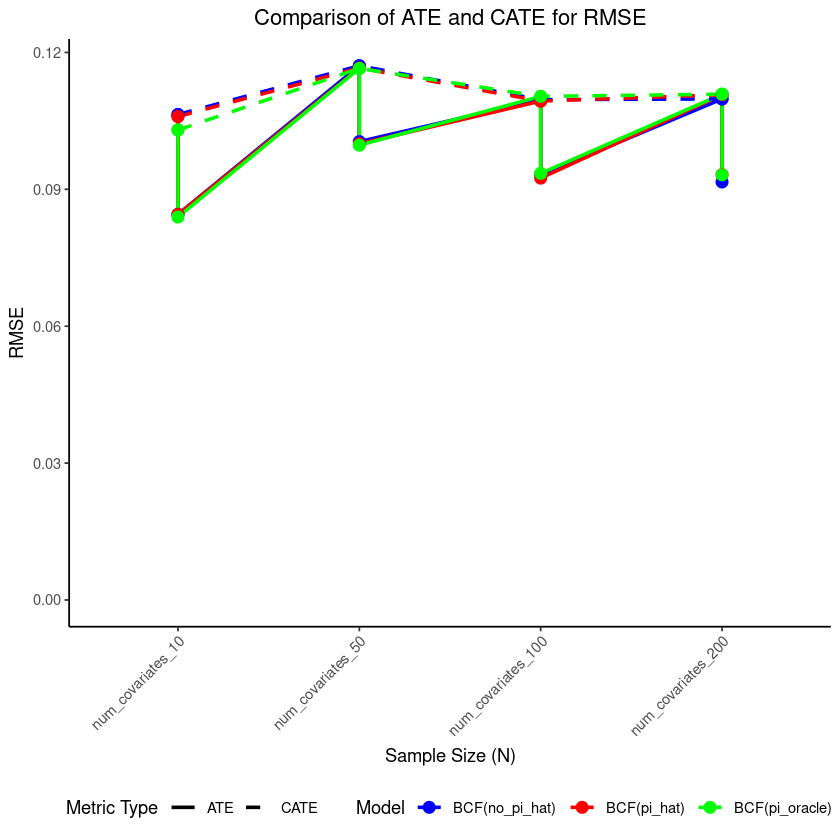

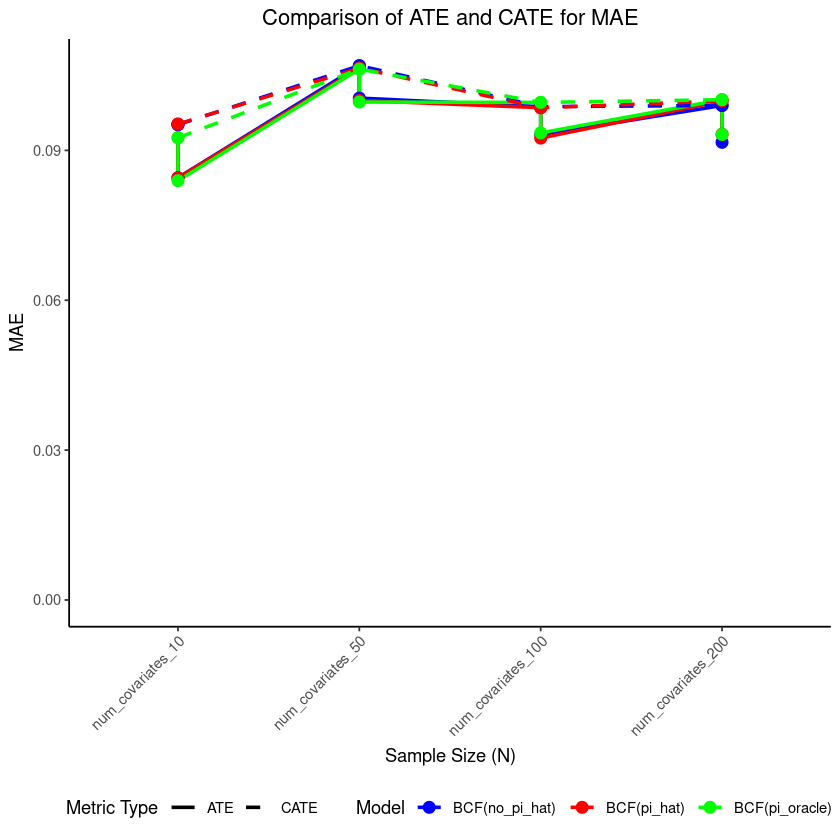

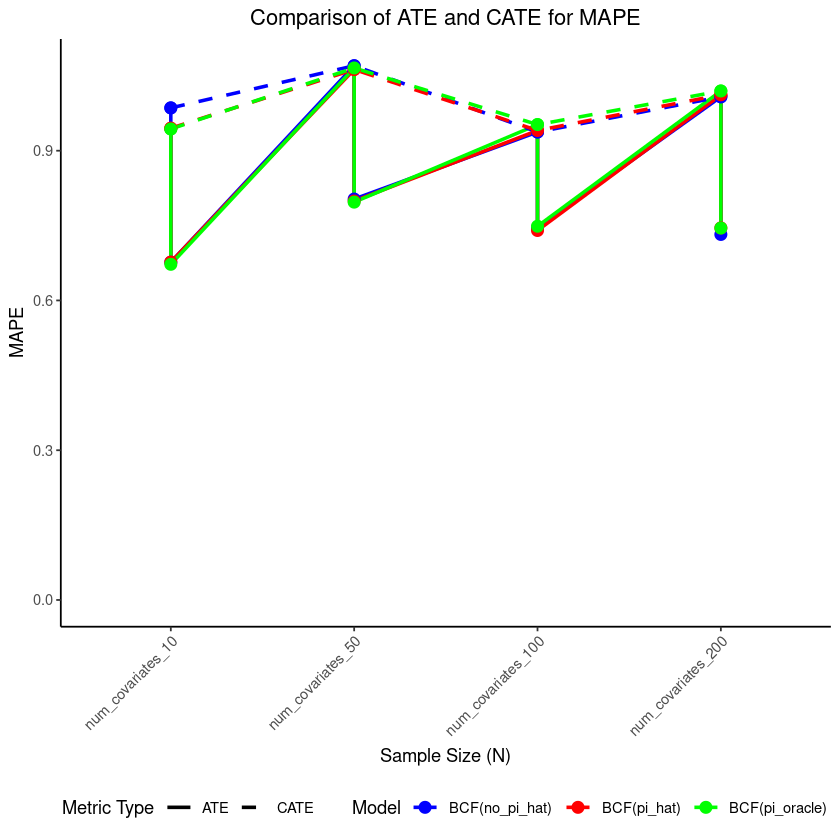

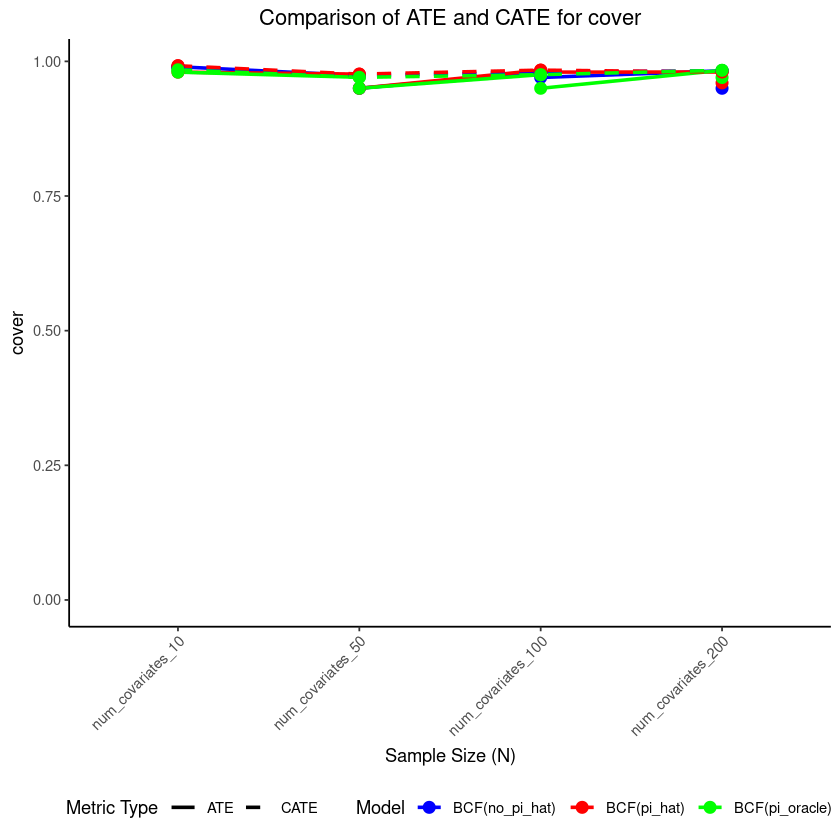

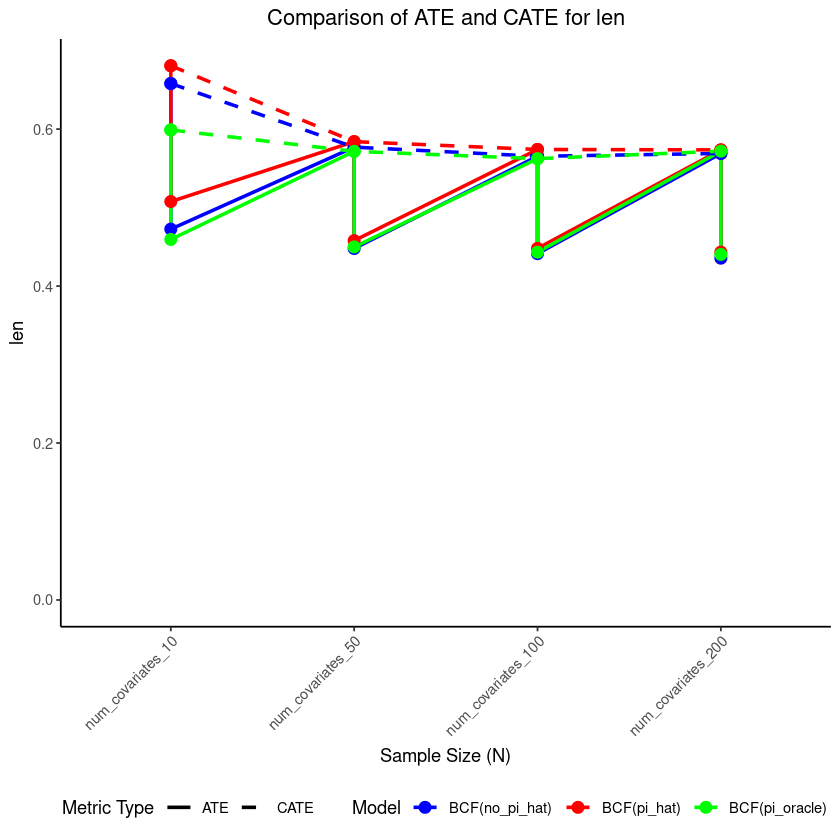

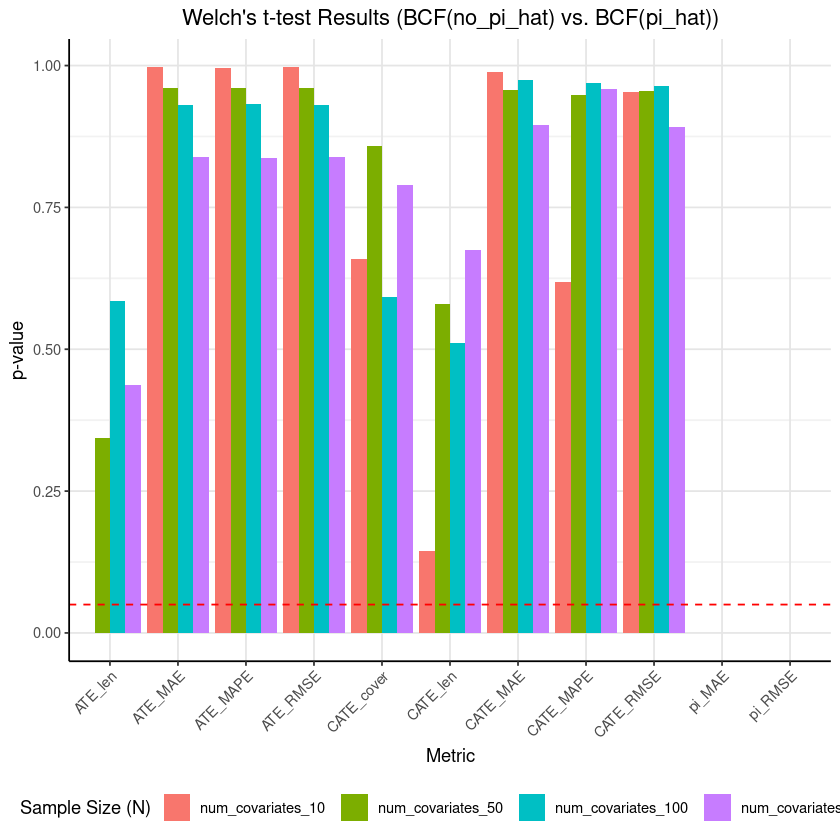

In [2]:
library(ggplot2)
library(ggpubr)
library(stringr)

# List of sample sizes
sample_sizes <- c("num_covariates_10", "num_covariates_50", "num_covariates_100", "num_covariates_200")

# List of models
model_names <- c("BCF(no_pi_hat)", "BCF(pi_hat)", "BCF(pi_oracle)")

metrics_for_line_plots <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE","CATE_cover", "CATE_len",
                             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_cover", "ATE_len")

# List of all metrics
all_metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len", "ATE_cover","pi_RMSE", "pi_MAE")

# Function to read data and calculate summary statistics for a given sample size
read_and_summarize <- function(sample_size) {
  file_names <- c(
    paste0("BCF(no_pi_hat)_", sample_size, ".xlsx"),
    paste0("BCF(pi_hat)_", sample_size, ".xlsx"),
    paste0("BCF(pi_oracle)_", sample_size, ".xlsx")
  )

  # Read the data using map_dfr
  data_list <- purrr::map2(file_names, model_names, ~{
    read_excel(.x) %>%
      summarise(across(all_of(all_metrics), mean)) %>%
      pivot_longer(cols = all_of(all_metrics), names_to = "metric", values_to = "mean") %>%
      mutate(model = .y, sample_size = sample_size) # Add model and sample size information
  })

  # Combine all data frames
  combined_data <- bind_rows(data_list)
  return(combined_data)
}

# Read and summarize data for all sample sizes
all_data <- purrr::map_dfr(sample_sizes, read_and_summarize)

# Create line plots, combining ATE and CATE
line_plots <- list()
ate_cate_metrics <- c("RMSE", "MAE", "MAPE", "cover", "len") # Metrics to combine ATE and CATE

for (metric_base in ate_cate_metrics) {
  # Filter data for the current metric (ATE and CATE)
  data_subset_ate <- all_data %>%
    filter(str_detect(metric, paste0("ATE_", metric_base))) %>%
    mutate(metric_type = "ATE")
  data_subset_cate <- all_data %>%
    filter(str_detect(metric, paste0("CATE_", metric_base))) %>%
    mutate(metric_type = "CATE")

  # Combine ATE and CATE data
  data_combined <- bind_rows(data_subset_ate, data_subset_cate)

  # Create the line plot
  line_plots[[metric_base]] <- ggplot(data_combined, aes(x = factor(sample_size, levels = sample_sizes), y = mean, color = model, group = interaction(model, metric_type), linetype = metric_type)) + #corrected x axis
    geom_line(linewidth = 1) +
    geom_point(size = 3) +
    labs(
      title = paste("Comparison of ATE and CATE for", metric_base),
      x = "Sample Size (N)",
      y = metric_base,
      color = "Model",
      linetype = "Metric Type"
    ) +
    scale_color_manual(values = c("BCF(no_pi_hat)" = "blue", "BCF(pi_hat)" = "red", "BCF(pi_oracle)" = "green")) +
    scale_linetype_manual(values = c("ATE" = "solid", "CATE" = "dashed")) +
    theme_classic() +
    theme(
      plot.title = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1),
      legend.position = "bottom"
    )+
    scale_y_continuous(limits = c(0, NA))

  # Save the plot
  ggsave(
    filename = paste0("ate_cate_comparison_", metric_base, ".png"),
    plot = line_plots[[metric_base]],
    width = 10,
    height = 6,
    units = "in"
  )
}

# Display the line plots
for (metric_base in ate_cate_metrics) {
  print(line_plots[[metric_base]])
}


# List of all metrics
all_metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len","pi_RMSE", "pi_MAE")

t_test_results <- list()
for (sample_size in sample_sizes) {
  file_no_pi_hat <- paste0("BCF(no_pi_hat)_", sample_size, ".xlsx")
  file_pi_hat <- paste0("BCF(pi_hat)_", sample_size, ".xlsx")

  df_no_pi_hat <- read_excel(file_no_pi_hat)
  df_pi_hat <- read_excel(file_pi_hat)

  t_test_results[[sample_size]] <- data.frame(metric = all_metrics) # Store results with the metric name
  for (metric in all_metrics) {
    test_result <- t.test(df_no_pi_hat[[metric]], df_pi_hat[[metric]], var.equal = FALSE)
    t_test_results[[sample_size]][t_test_results[[sample_size]]$metric == metric, "t_statistic"] <- test_result$statistic
    t_test_results[[sample_size]][t_test_results[[sample_size]]$metric == metric, "p_value"] <- test_result$p.value
  }
  t_test_results[[sample_size]]$sample_size_n = sample_size #add sample size
}

# Combine t-test results for plotting
t_test_df <- bind_rows(t_test_results, .id = "sample_size")
t_test_df$sample_size_n <- factor(t_test_df$sample_size_n, levels = sample_sizes) #order


# Bar plot for p-values
bar_plot_p_val <- ggplot(t_test_df, aes(x = metric, y = p_value, fill = sample_size_n)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Welch's t-test Results (BCF(no_pi_hat) vs. BCF(pi_hat))",
    x = "Metric",
    y = "p-value",
    fill = "Sample Size (N)"
  ) +
  theme_classic() + # Changed theme here
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "bottom",
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey95")
  ) +
  geom_hline(yintercept = 0.05, color = "red", linetype = "dashed") +
  scale_y_continuous(limits = c(0, NA)) # Set y-axis minimum to 0

# Save the plot
  ggsave(
    filename = "t_test_results_p_value.png",
    plot = bar_plot_p_val,
    width = 10,
    height = 6,
    units = "in"
  )
print(bar_plot_p_val)